## Import Packages

In [1]:
import numpy as np
import pandas as pd
import nltk
import multiprocessing 

## Upload data

In [3]:
df = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Data/brca_new.csv')
df.head()

,PostId,TopicTitle,PostType,Sequence,ForumName,RawText
0,F162 T829657 original,Immunotherapy drugs for breast cancer,original,0,"Immunotherapy - Before, During and After",Immuno-Oncology (IO) and Immunotherapy drugs ...
1,F162 T829657 post_4337424,Immunotherapy drugs for breast cancer,reply,1,"Immunotherapy - Before, During and After",I'm no expert.I found this and maybe it wi...
2,F162 T829657 post_4337443,Immunotherapy drugs for breast cancer,reply,2,"Immunotherapy - Before, During and After",The Her2+ recurrence prevention trial I di...
3,F162 T829657 post_4353477,Immunotherapy drugs for breast cancer,reply,3,"Immunotherapy - Before, During and After",SpecialK what immune drug was part of your...
4,F162 T829657 post_4353488,Immunotherapy drugs for breast cancer,reply,4,"Immunotherapy - Before, During and After",chrissie - it was the GP2 peptide vaccine ...


In [4]:
df[['ID', 'Post_ID', 'Post_No']] = pd.DataFrame([ x.split() for x in df['PostId'].tolist() ])

In [5]:
df.head()

,PostId,TopicTitle,PostType,Sequence,ForumName,RawText,ID,Post_ID,Post_No
0,F162 T829657 original,Immunotherapy drugs for breast cancer,original,0,"Immunotherapy - Before, During and After",Immuno-Oncology (IO) and Immunotherapy drugs ...,F162,T829657,original
1,F162 T829657 post_4337424,Immunotherapy drugs for breast cancer,reply,1,"Immunotherapy - Before, During and After",I'm no expert.I found this and maybe it wi...,F162,T829657,post_4337424
2,F162 T829657 post_4337443,Immunotherapy drugs for breast cancer,reply,2,"Immunotherapy - Before, During and After",The Her2+ recurrence prevention trial I di...,F162,T829657,post_4337443
3,F162 T829657 post_4353477,Immunotherapy drugs for breast cancer,reply,3,"Immunotherapy - Before, During and After",SpecialK what immune drug was part of your...,F162,T829657,post_4353477
4,F162 T829657 post_4353488,Immunotherapy drugs for breast cancer,reply,4,"Immunotherapy - Before, During and After",chrissie - it was the GP2 peptide vaccine ...,F162,T829657,post_4353488


In [79]:
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     

def main(): 
    str = "Immuno-Oncology (IO) and Immunotherapy drugs are humanitys best shot at beating cancer. During the last few years, IO has revealed impressive, durable responses in a variety of tumor types for which conventional therapies historically have had limited success (melanoma, leukemia, lymphoma, lung, liver, bladder, etc). The power of this approach is highlighted in countless articles (like here and here) as well as a variety of TV broadcasts, including: 1) HBOs Vice TV special: Killing Cancer, explored a subset of IO called Virotherapy and how the following three common viruses are genetically modified to find and kill cancer:- A re-engineered Measles virus was used to treat patients with Multiple Myeloma. A re-engineered Adenovirus (like the common cold) to treat patients with Glioblastoma (GBM) brain tumors. A re-engineered HIV virus to treat patients with the blood cancer Leukemia. 2) 60 Minutes TV special: Killing Cancer focused on curing GBM by using a re-engineered Polio virus. 3) PBS TV special: Cancer: The Emperor of All Maladies tells the complete story of cancer, from its history to current breakthroughs. Its six hours long, broken into three videos, with the last part covering IO. Weve reached an inflection point to change the trajectory of breast cancer treatment. In late 2015, an unprecedented coalition was formed to accelerate progress in IO. Called the Cancer Moon Shot 2020 (#CancerMoonShot), this endeavor will bring patients closer to Immunotherapies and precision medicine, by not only exploiting genetics (DNA), but also epigenetics (gene expression), proteomics (protein expression), metabolomics (cancer metabolism). Heres a couple videos discussing the effort:4) Cancer MoonShot 2020, explained in very simple terms, here. 5) Cancer MoonShot 2020 Press Conference (Jan 2016), here. Listen to the experts. If youre smart, you asked the question: how can immunotherapy be harnessed in Breast Cancer?  To answer this, I researched the usual resources and was surprised at the paucity of info. Breastcancer_orgs page, Using the Immune Response to Treat BC is outdated and extremely incomplete. It only discusses these Monoclonal Antibodies (mAbs) used for HER2+ patients: Herceptin (trastuzumab), Tykerb (lapatinib), Perjeta (pertuzumab), Kadcyla (Trastuzumab or T-DM1). The Cancer Research Institutes webpage, Immunotherapy for Breast Cancer, is the most comprehensive resource for US based research, although it was last updated Sept 2014. [Dr Leisha Emens of John Hopkins reviewed and updated the webpage in March 2016]. Its written that breast cancer has historically been considered immunologically silent. This statement may contribute to why breast cancer lags behind when compared to other cancers. This notion that breast cancer, in particular ER+ disease, is not very immunogenic is an antiquated view that needs to end. I understand its early days, but the breast cancer industry needs a serious paradigm shift. Listen to this comment at the 2016 CancerMoonShot press conference here). Priorities should be realigned towards the basic science of IO and then translated into cures that exceed the 7% that standard therapies offer metastatic patients over 10 years (Source: Weissman, June 2015, 10:00 minute mark). As patients / caretakers, we should be discussing Immunotherapies with our doctors, encouraging breast cancer researchers to explore this approach and supporting funding efforts aimed at moving the field forward. So, in a effort to advocate for this community, I wanted to start this topic and get others to ask these questions:- What progress is being made in Breast Cancer Immunotherapy?- Who are the thought leaders and researchers in Breast Cancer Immunotherapy?- Most importantly, where are the Breast Cancer. Im no expert. I found this and maybe it will be of some help. The Her2+ recurrence prevention trial I did was for encouragement of the patients immune system to fight recurrence through vaccines. chrissie - it was the GP2 peptide vaccine given with GM-CSF. This was a two armed trial, and half were given GP2 and half AE37, and some placebo with no vaccine. The placebo was the GM-CSF, so everybody got something, the GM-CSF is similar to Neulasta/Neupogen so it was potentially immune boosting by itself. We were sorted into the arms by histological tissue type like for organ transplant. I did phase II, which is now closed to enrollment. There is no word yet regarding the start of phase III. Thanks for the info. There is a Phase 2 trial on Neuvax but I might be too late in inquiring because the treatment is supposed to start after the 3rd adjuva. Which trial are you looking at? I had thought that neuvax was for low Her2? I saw that one but I also saw this one- Phase II Trial of Combination Immuno. SpecialK - maybe I am reading it wrong but I thought is was an active study. The following link appears to be the most up to date summary of  Immunotherapy for breast cancer. Its mostly a lot of big words that probably wont make much sense unless youre doing daily research. Someday, Ill edit this post and attempt to match these therapies to the appropriate clinical trials. Will immunotherapy help us cure breast cancer?1. Monoclonal antibodies (mAbs) currently being researched in breast cancer clinical trials include:  - Avastin (bevacizumab), which targets the tumor growth factor VEGF-A    - Cyramza (ramucirumab), which targets the tumor growth factor VEGFR-2   - MGAH22 (margetuximab), which blocks the action of HER2 on tumor growth   - OMP-18R5 (vantictumab), which targets a tumor growth pathway known as the Wnt beta-catenin signaling pathway   - LJM716, which blocks a protein called HER3 that enables tumors to become resistant to treatment   - LY2875358, an anti-MET antibody   - CDX-011 (glembatumumab vedotin) and IMMU-132, which target cellular proteins that enable tumors to metastasize2. Therapeutic cancer vaccines currently being researched in breast cancer clinical trials include:  - A HER2 peptide vaccine called NeuVax (nelipepimut-S) UPDATE - JUNE 2016: The NeuVax Phase 3 clinical trial (PRESENT) has been stopped (cancelled), due to futility. NeuVax was unable to prevent recurrence in this trial; a HER2-pulsed dendritic cell vaccine; and the peptide vaccines E39 and J65, which are being tested to prevent breast cancer recurrence  - AV901, which helps the immune system destroy tumor cells that express HER2  - INO-1400 (by Inovio Pharmaceuticals), a synthetic DNA vaccine targeting the hTERT antigen. hTERT = human telomerase reverse transcriptase [This is being explored for Triple Negative BC]. 3) Checkpoint inhibitors/immune modulators currently being researched in breast cancer clinical trials include:  - The anti-CTLA-4 antibody Yervoy (ipilimumab) - The anti-PD-1 antibodies Keytruda (pembrolizumab, MK-3475) and Opdivo (nivolumab) - The anti-PD-L1 antibodies MPDL3280A and MEDI4736 - The antibodies MEDI6469 and MEDI63834. The following types of adoptive T cell transfer are being researched for patients with breast cancer:  - Tumor infiltrating lymphocytes (TILs) that are removed from a patients tumor, boosted in the lab, then given back to the patient. This is essentially CAR-T Immunotherapy, which has cured a number of people with hematological malignancies like Leukemia & Lymphoma. - T cells genetically engineered to target several cancer-associated antigens, including:   * HER2          *  cMet protein          * CEA          * VEGFR-2          * MAGE-A35. Cytokines currently being researched in clinical trials of breast cancer include the following interleukins:- Interleukin-2, an important growth factor for white blood cells Interleukin-7, an important growth factor for T cells and B cells. 6) Adjuvant immunotherapies currently being researched in breast cancer clinical trials include:- Indoximod, an IDO inhibitor, which blocks an immunosuppressive molecule produced by tumor cells- Poly-ICLC, a Toll-like receptor (T    This is an update on the Immunotherpy drug  Keytruda (AKA: Pembrolizumab, MK-3475). Keytruda is a Monoclonal antibody and acts as a checkpoint inhibitor, specifically a PD1 inhibitor. It targets the PD-1 protein on T cells (a kind of immune cell). The drug removes the brakes (biological blockades) that keep T cells (also called T lymphocytes) from attacking cancer. Its FDA approved for Lung cancer and Melanoma (think former President Jimmy Carter). As a single agent (monotherapy), its shown to be useful in TNBC trials and has similar potential in ER+ disease, as just reported by Dr Hope Rugo of UCSF, here, Pembrolizumabs Potential in ER+ / HER2- patients.As of Feb 2016, Keytruda is in at least 20 different clinical trials for breast cancer, listed below (This may not be a complete list and serves as a springboard to get you started. Please do your own due diligence). 01 metastatic ER+ [NCT02395627] This one deals with Epigenetics, and includes a HDAC inhibitor too!02 metastatic ER+, HER2- [NCT02054806] KEYNOTE-28 trial. A basket trial evaluating 20 different types of cancer with PD-L1 expression. Results of the ER+, HER2- are here. 03) metastatic IBC [NCT02411656] 04) metastatic TNBC or metastatic ER+, HER2- [NCT02648477] 05) metastatic TNBC [NCT02513472] KEYNOTE-150 trial06. metastatic TNBC [NCT02447003] KEYNOTE-086 trial07. metastatic TNBC [NCT02555657] KEYNOTE-119 trial08. metastatic HER2+ [NCT02129556] PANACEA trial09. metastatic HER2+ [NCT02318901] PembroMab trial10. metastatic TNBC & other solid tumors [NCT02646748] This one deals with the Tumor Microenvironment, and includes a JAK inhibitor, and a PI3K inhibitor. 11) TNBC & other solid tumors [NCT02452424] KEYNOTE-103 trial. 12) TNBC & other solid tumors [NCT02644369] INSPIRE trial. 13) TNBC & other solid tumors [NCT02432963]. 14) TNBC [NCT02622074] KEYNOTE 173 trial. 15) TNBC and/or HER2+ [NCT02178722] KEYNOTE-037 trial. This one includes a IDO Inhibitor. 16) ER+ & other solid tumors [NCT02331251] PembroPlus trial. 17) oligometastatic breast cancer [NCT02303366] BOSTON II trial. 18) Any invasive breast cancer [NCT01042379] I-SPY 2 trial. Evaluating numerous agents among 1,200 patients19. Unknown types of breast cancer [NCT02009449] This one includes AM0010, a humanized version of the immune protein called interleukin-10 (IL-10) - No longer accepting breast cancer patients. 20) metastatic breast cancer & other solid tumors [NCT01174121] This one involves growing patient-extracted Tumor Infiltrate. The largest analysis of breast cancer cell function to date suggests dozens of new uses for existing. This is an update on the Immunotherapy drug Opdivo (AKA: Nivolumab) Like Keytruda (see post above), Opdivo is a Monoclonal antibody and acts as a checkpoint inhibitor, specifically a PD1 inhibitor. It targets the PD-1 protein on T cells (a kind of immune cell). The drug removes the brakes (biological blockades) that keep T cells (also called T lymphocytes) from attacking cancer. As of Nov 2016, Opdivo is approved by the FDA for 5 different cancers:1) Melanoma 2) Squamous non-small cell Lung cancer (NCSLC) 3) Kidney cancer (renal cell Kidney cancer - renal cell carcinoma or RCC) 4) Hodgkin Lymphoma (for those that relapsed or progressed after autologous hematopoietic stem cell transplantation [HSCT]) 5) Head and Neck (SCCHN) (for recurrent or metastatic squamous cell carcinoma)  [Head and neck cancer is a group of cancers that includes cancers of the oral cavity, larynx, pharynx, salivary glands, and nose/nasal passages]. This approval was based on the Phase III Head & Neck clinical trial called CheckMate -141, described here. As of Feb 2016, Opdivo is being used in the following breast cancer clinical trials (This may not be a complete list and serves as a springboard to get you started. Please do your own due diligence 1) metastatic TNBC [NCT01928394]A Phase 1/2, Open-label Study of Nivolumab Monotherapy or Nivolumab Combined With Ipilimumab in Subjects With Advanced or Metastatic Solid Tumors Estimated Enrollment: 1100 Study Start Date: October 2013 Estimated Primary Completion Date: August 2017 More info from Sloan Kettering, here. Trial locations include: Colorado, Connecticut, Florida, Georgia, Maryland, Massachusetts, New York, North Carolina, Oregon, Tennessee, Texas, Washington; Canada, Denmark, Finland, Germany, Italy, Spain, United Kingdom, maybe more2. All breast cancer patients, with exception to HER2+ [NCT02309177] A Phase 1, Open-Label, Multicenter, Safety Study of Nivolumab (BMS-936558) in Combination With Nab-Paclitaxel Plus or Minus Gemcitabine in Pancreatic Cancer, Nab-Paclitaxel / Carboplatin in Stage IIIB/IV Non-Small Cell Lung Cancer or Nab-Paclitaxel in Metastatic Breast Cancer Estimated Enrollment: 138 Study Start Date: December 2014 Estimated Primary Completion Date: July 2017 Trial locations include: Arizona, California, Connecticut, Florida, Illinois, Massachusetts, New Jersey, North Carolina, Ohio, Pennsylvania, Washington, Wisconsin, maybe more3. All Stage III & IV breast cancer patients, with exception to HER2+ [NCT02453620] A Phase 1 Study Evaluating Safety, Tolerability, and Preliminary Antitumor Activity of Entinostat and Nivolumab With or Without Ipilimumab in Advanced Solid Tumors Estimated Enrollment: 45 Study Start Date: November 2015 Estimated Primary Completion Date: January 2017 Trial locations include: California, Connecticut, Maryland, Pennsylvania, maybe more. 4) metastatic TNBC [NCT02499367] Adaptive Phase II Randomized Non-comparative Trial of Nivolumab After Induction Treatment in Triple-negative Breast Cancer (TNBC) Patients: TONIC-trial Estimated Enrollment: 84 Study Start Date: August 2015 Estimated Primary Completion Date: August 2019 Trial locations include: Netherlands, maybe more** The following involve Opdivo with other experimental agents for various solid tumors (in theory, this includes breast cancer, but requires verification from the trial investigators): 5) metastatic breast cancer [NCT02009449] A Phase 1, Open-Label Dose Escalation First-in-Human Study to Evaluate the Tolerability, Safety, Maximum Tolerated Dose, Preliminary Clinical Activity and Pharmacokinetics of AM0010 in Patients With Advanced Solid TumorsEstimated Enrollment: 300 Study Start Date: November 2013 Estimated Primary Completion Date: December 2016 Trial locations include: California, Colorado, Florida, Massachusetts, New York, Oklahoma, Tennessee, Texas, maybe more. 6) metastatic breast cancer [NCT02467361] A Study of BBI608 Administered in Combination With Immune Checkpoint Inhibitors in Adult Patients With Advanced Cancers Estimated Enrollment: 120 Study Start Date: August 2015 Estimated Primary Completion Date: August 2017 Trial locations include: Georgia, Illinois, Massachusetts, New York, South Carlina, maybe more. 7) metastatic breast cancer [NCT02423954] Study of Nivolumab Plus Chemotherapy in Patients With Advanced Cancer (NivoPlus) (NivoPlus) Estimated Enrollment: 49 Study Start Date: April 2015 Estimated Primary Completion Date: April 2017 Trial locations include: Arizona, maybe more. 8) metastatic breast cancer [NCT02483247]A Study of BBI503 in Combination With Selected Anti-Cancer Therapeutics in Adult Patients With Advanced Cancer Estimated Enrollment: 200 Study Start Date: September 2015 Estimated Primary Completion Date: September 2017 Trial locations include: California, Illinois, Indiana, Louisiana, Massachusetts, Ontario Canada, maybe more. 9) metastatic breast cancer & Lymphoma [NCT02253992]Safety and Tolerability of Urelumab Administered in Combination With Nivolumab in Solid Tumors and B-cell Non-Hodgkins Lymphoma Estimated Enrollment: 200 Study Start Date: September 2014 Estimated Primary Completion Date: December 2016 Trial locations include: California, Florida, Illinois, Maryland, Massachusetts, New York, Oregon, Pennsylvania, Texas, France, Germany, Spain, maybe more. 10) metastatic breast cancer [NCT02598960]Study of BMS-986156 Given Alone and in Combination With Nivolumab in Subjects With Advanced Solid Tumors Estimated Enrollment: 260 Study Start Date: October 2015 Estimated Primary Completion Date: May 2018 Trial locations include: Tennessee, Australia, Ontario Canada, maybe more. 11) metastatic breast cancer [NCT02423343]Study of Galunisertib (LY2157299) in Combination With Nivolumab in Advanced Refractory Solid Tumors and in Recurrent or Refractory NSCLC, Hepatocellular Carcinoma, or Glioblastoma Estimated Enrollment: 100 Study Start Date: October 2015 Estimated Primary Completion Date: April 2018 Trial locations include: Alabama, California, Florida, Massachusetts, North Carolina, Texas, Spain, maybe more. 12) metastatic breast cancer [NCT02614456]Combination of Interferon-gamma and Nivolumab for Advanced Solid TumorsEstimated Enrollment: 15 Study Start Date: December 2015 Estimated Primary Completion Date: December 2017  (Final data collection date for primary outcome measure)Trial locations include: Pennsylvania, maybe more. 13) metastatic breast cancer [NCT01714739]Phase I Study of an Anti-KIR Antibody in Combination With an Anti-PD1 Antibody in Patients With Advanced Solid Tumors Estimated Enrollment: 162 Study Start Date: October 2012 Estimated Primary Completion Date: September 2017 Trial locations include: Illinois, Maryland, Massachusetts, New York, Oregon, Pennsylvania, maybe more. 14) metastatic breast cancer [NCT01968109]Study of Anti-LAG-3 With and Without Anti-PD-1 in the Treatment of Solid Tumors Estimated Enrollment: 540Study Start Date: October 2013 Estimated Primary Completion Date: September 2016 Trial locations include: Illinois, Maryland, Massachusetts, Michigan, New York, Oregon, Pennsylvania, Texas, Washington, Italy, Japan, Spain, maybe more. 15) metastatic breast cancer [NCT02518958]Phase I, Open-Label, Multiple Ascending Dose Study of RRx-001 and Nivolumab (PRIMETIME)Estimated Enrollment: 45Study Start Date: July 2015 Estimated Primary Completion Date: July 2017  Trial locations include: Maryland. With the media recently highlighting the remarkable Immunotherapy stories (like here, here, here, and here) of cancer patients achieving No Evidence of Disease [NED], I thought it would be wise to remind everyone that Immunotherapy breast cancer clinical trials do exist. I found 241 clinical trials open for breast cancer Immunotherapy. 11 of the 241 are Phase III trials. The rest are Phase I and II trials. Heres some resources to find those clinical trials:1) Cancer Research Institutes: Immunotherapy Clinical Trial FinderCall 1-855-216-0127 (toll-free) to reach a Clinical Trial Navigator who will help identify appropriate trials. 2) NIH Clinical Trials: ClinicalTrials_gov The worlds largest clinical trials database. 3) Breast Cancer Trials: BreastCancerTrials_org Focused on breast cancer. Wow, Mr Smith, you sure did a through job. Your lists should probably be posted somewhere as a resource or reference. Looks like 2017 is the year for it all. Thanks, John. Im in a Herceptin/NeuVax trial in DC for low and intermediate HER2 expressors. Theyre still recruiting, but you have to have just finished treatment. Thanks again, John. Here is a link to a thread on the Inspire website that was started by a member who is part of a Tumor-Infiltrating Lymphocyte trial that is really exciting. There is also a trial for Her2+ breast cancers with Pembrolizumab (Keytruda)  https://clinicaltrial_gov/ct2/show/NCT02318901?te. This Is some of the research that has led to this trial - http://m_cancerdiscovery_aacrjournals_org/content/. So, it looks like they are looking at it for almost all breastSo, it looks like they are looking at it for almost all breast cancers now, except maybe for IBC?Best wishes to all   cancers now    Hi, John!I am hoping to be a part of the KEYNOTE-086 trial for TNBC at Emory. Thank you for posting this info. I have been trying to find out more, but have not had much luck. I am going for scans, labs, etc next week, and if all goes well will start treatment the next week. My family and I are very encouraged by what we have been told. Please keep posting any info you may find.I would love to    Hi All,Have you heard about this particular trial and know how it is going ?    There is a woman on the Inspire website who has seen a 60% reduction in her tumors since receiving her primed T-cells. You can read about it following this     Thanks Sue. Ill reply to your PM tomorrow.@letmywifeliveThat trial, Immunotherapy Using Tumor Infiltrating Lymphocytes for Patients With Metastatic Cancer [NCT01174121], is being run by Dr. Steven Rosenberg at the NCI, who is a bit of a Immunotherapy rockstar.The trouble is that  this trial only accepts Stage IV patients that have failed standard therapies. Note the following inclusion criteria:All patients must be refractory to approved standard systemic therapy. Specifically, Breast and Ovarian cancer patients must be refractory to both 1st line and 2nd line treatments and must have received at least one second line chemotherapy regimen. I assume your wife wants to avoid chemo. There must be trials that circumvent this requirement. I think it might be a good idea to call the Clinical Tr Immunotherapy medicines use the power of your bodys immune system to attack cancer cells. Your immune system is the network of organs, tissues, and cells that work together to protect your body from attacks by foreign invaders such as bacteria, parasites, viruses, and fungi that can cause infection and disease. When these invaders find their way into your body -- whether through a break in the skin, for example, or through your mouth or nose -- your immune systems response is the self-defense system that works to keep you from getting sick. Immunotherapy medicines work by helping your immune system work harder or smarter to attack cancer cells. In cancer treatment, immunotherapy uses substances made by your body or in a lab to improve the function of the immune system by allowing the immune system to: stop or slow the growth of cancer cells stop cancer from spreading to other parts of the body be better at destroying cancer cells In the main Breastcancer_org sites section on Immunotherapy, you can learn more about: What Is Immunotherapy? Is Immunotherapy Right for You? Cancer Vaccines Immune Checkpoint Inhibitors Adoptive Cell Therapy Immune Targeted Therapies Cytokines. Please come back to this forum to start your own threads about your experiences with immunotherapy. Immunotherapy for Breast Cancer: Part 1, March 28, 2018 Sherene Loi, MD, PhD Dr Sherene Loi is a medical oncologist who specializes in treating breast cancer. In addition to treating patients, particularly patients diagnosed with HER2-positive breast cancer, she also leads the Translation Breast Cancer Genomics and Therapeutics Laboratory at the Peter MacCallum Cancer Centre in Melbourne, Australia, where she is a professor. Much of her clinical research focuses on investigating new treatments, such as immunotherapy, especially for breast cancers that have become resistant to standard treatments. Listen to the podcast to hear Dr Loi explain:results from the PANACEA trial, which looked at using the immunotherapy medicine Keytruda (chemical name: pembrolizumab) along with Herceptin to treat Herceptin-resistant, HER2-positive, advanced-stage breast cancer that had high levels of PDL-1, a biomarker that indicates that Keytruda will be effective how an immunotherapy medicine like Keytruda works what tumor-infiltrating lymphocytes (TILs) are and why cancer tumors with high numbers of TILs seem to respond better to immunotherapyside effects of immunotherapy medicines Running time: 17:52    Thank you for this podcast!  and thank you Mods for letting us know about it. Thank you so much for creating this forum. I believe it is a the most advanced form of treatment, and your support will encourage our women and men to seek. Thank you for this forum as it looks like this may be the way to go for many of us in the near future. My oncologist asked me if i was interested in going in a trial for immunotherapy after chemotherapy has failed me for the third time in almost six years, so thats not bad. I say go ahead, I hope I qualify and its all in the interest of the next generation of cancer patients. Lets hope that its. Oh manymoo, hoping so much you get in a clinical trial and that it goes well.    I am presently being treated with the immunotherapy drug opdivo for my stage 4, triple negative, pleomorphic lobular breast cancer. At the time I began receiving treatment I was very sick. I had failed 6 lines of therapy for stage 4 breast cancer and was being referred for hospice care.  Little did I know I was on the cusp of experiencing a level of healing that feels nothing short of miraculous.Following an emergency surgery at UCSD, San Diego, CA, I learned about a clinical trial called I-Predict (https://clinicaltrials.gov/ct2/show/NCT02534675). The purpose of this study is to learn more about personalized cancer therapy. Genomic testing on my tumor tissue was used to develop a treatment plan specifically targeted to my cancer cells. Due to the very high tumor mutation burden of my cancer, as well as a high PD-1, I was considered a good candidate for immunotherapy treatment with opdivo.Here was my BENEFIT:After just 4 immunotherapy infusions my tumor markers dropped significantly (82% to 94%). I began treatment mid February and by July, all tumor markers were within normal range. After just 8 weeks of therapy my CT scans suggested a complete response. The cancer lesions were no longer visible! I am feeling great! In fact, last January, I had a surgery which confirmed that the cancer previously seen in my GI tract is all GONE. My own immune system is presently able to recognize and kill the cancer cells. Here are some RISKS:Immunotherapy super-charges the immune system. The risk is that one will develop autoimmune disorders. The disorders range from big scary things like: lupus, GI tract inflammation, rheumatoid arthritis (RA), scleroderma, liver disorders, thyroid disorders, pituitary gland disorders to small and manageable things like an occasional UTI, conjunctivitis, skin rash or other very treatable -itis. I think the big scary things are very uncommon.Here were my side effects:My joints began to enlarge and though I had no pain, it appeared I was developing RA. Symptoms did not progress and I feel fine (several joints in my fingers remain enlarged). I also had eczema flare ups that went away. I had two occasions of conjunctivitis for no apparent reason. It went away with eye drops. The skin on my hands showed symptoms of scleroderma. It went away.MORE BENEFITS:I am ALIVE. I have NO EVIDENCE OF DISEASE ANYWHERE!! Before treatment, one of my tumor markers, the CA27.29, had reached over 1300. For the last 12 months, it has remained  within the normal range of less than 38.6. At the time I began treatment, I had from weeks to perhaps 1-2 months to live. I am just so grateful to be alive! Sometimes I wake up long before daylight with the same joy and excitement a child feels on Christmas morning. Like the young child, I force myself to remain in bed until the first light of day. Then I bounce out of bed confident that this new day will overflow with gifts. And it does!I am grateful to God for the gift of more time with my family and friends. I am grateful to researchers for unraveling some of the mysteries associated with cancer. I am grateful to you for reading and perhaps sharing my story so that a cup of hope may be given to someone in need.  While I cannot know if or when I may have a recurrence, I do know that I have today. What a gift!!Friend, leave no stone unturned. Explore clinical trials. Pursue genomic testing to see if immunotherapy or another form of targeted therapy might benefit you. From the rear view mirror, I see the hand of God in the glove of so very many circumstances that have permitted me to be alive today to write these words you are readying. I pray my story will become your story.    Dear HealingHopeYour post is so inspiring and informative!  Thank you!   I am so glad for you the results you have gotten!  That is amazing.  Medicine owes its progress to intrepid and brave women like you who are willing to lay it on the line and try new therapies.  This one sounds so promising. I am sorry for the unpleasant side effects you have suffered but like you said -- yay! youre alive.  I salute you!  I hope you keep us updated on your progress.Thank God for clinical trials. If I find myself in a situation where a clinical trial might be appropriate I am going to try my hardest to get into one myself. I dont know my staging yet after a recent recurrence and I guess they normally try conventional the Healing hope, how inspirational your story is.... I see my oncologist tomorrow to discuss and I will wait and see. Fingers crossed that this thread will be a    Amica, I forgot to thank you for your posts. Heres hoping that more people w    Dear mandymooI am so sorry you have had chemo failures at Stage IV.  It must be so frightening.  I feel for you.  I do think immunotherapy is worth a shot, I think it is the future of cancer treatment, and fervently hope and pray that you are able to get into a clinical trial and achieve a good outcome.  Please let    apparent;y it will be phase 1 of ATX 101. No placebos. I am waiting to get the paperwork in the mail as I see my oncologist through teleconference. there doesnt appear to be any research papers that I can find and not much information at all.  I see him in another 3 weeks. At the moment I am a bit confused and I am also thinking about getting a second opinion, so I will see what happens within    Mandymoo,Good for you.  Let us know as you learn more.  A second opinion can Immunotherapy for Breast Cancer: Part II, April 10, 2018 Jennifer Litton, M.D. Dr. Jennifer Litton is a board certified medical oncologist and associate professor of breast medical oncology at the University of Texas MD Anderson Cancer Center in Houston, where she is chief of the Section of Clinical Research and Drug Development for Breast Cancer. She also is a member of the Breast Immuno-Oncology Task Force of the National Cancer Institute.Listen to the podcast to hear Dr. Litton discuss:how immunotherapy medicines workwhy immunotherapy medicines havent seemed to work as well in breast cancer as they have in other cancersthe direction of immunotherapy research for breast cancer Running time: 13:35Listen now o    I’ve read the data from the Herceptin and Neuvax trial, and it was certainly promising for triple negative participants with low-level Her2, which I was. It showed a 70% reduction in recurrence. The trial was closed ahead of schedule due to meeting objectives. The plan is to now get FDA approval. What is the hold-up? The process is frustrating. Will the Right to Try legislation apply to TNBC patients who dont get a pCR with neoadjuvant chemo? Also, why are there areas of the country where there are so few clinical trials? I live in Alabama, and it’s     Hi tnfrith, and thanks for posting!All great questions you have about this trial and the NeuVax approval. Were not sure we can answer your questions, but we bet thered be some great insight from our other members either on the Clinical Trials forum or also the thread here in the Immunotherapy forum called Immunotherapy drugs for breast cancer. Feel free to post in either place and see if anyon All,Im confused. Is there effective immunotherapy for breast cancer or not. I cant really find anything substantial on the internet. My Onc Doc said there isnt anything truly valuable yet.I have stage IV er+ pr ductal carcinoma. Mets to bones. I am quickly becoming multi-treatment resistant. The last 4 or 5 meds have crapped out shortly after treatment or not worked at all. Im in the market for a new trial. Hi Mudpie, my oncologist said we arent there yet. I believe there maybe BCO members who have had trial immunotherapy. Look on the stage 4 topics, I think traditional treatment must be tried first. It is very upsetting I know it makes so much sense to target the cancer cells instead of blanket poison to kill fast growing cells. From what I have read using a patients own modified T cells is a risky business as they can attack healthy organs. Commercials on tv are upsetting making it sound we are so far along with cancer treatment we are NOT. There absolutely are some immunotherapies that are working.  I know someone who was Stage 4, with very advanced disease from what I understand, that is now NED due to Opdivo.  However, it is not standard of care yet. Also, it wont help everyone.  However, for those it does help, it is a miracle.  You can only get access to it through cinical trials at this point.  Maybe take a look through www.cinicaltrials.gov, to see if you find anything that looks like a good fit. Rebek Thank You, I cant find a clinical related to Opdivo, unless I am looking in     Mudpie for Opdivo trials you need to search for nivolumab. I found 31 breast cancer trials currently recruiting. There are some passive immunotherapy drugs approved for breast cancer. Herceptin, Perjeta, and Kadcyla (TDM-1) are considered passive immunotherapies, as is Opdivo. Those are the only three currently approved that I am aware of unless something else has very recently been approved. Unfortunately only about 20% of us are HER2+ and can take advantage of them (and I give thanks every day that Im in the 20%). Your profile isnt visible (or hasnt been added) so I dont know your HER2 status or what treatments youve previously had. I dont think that Keytruda, a check point inhibitor immunotherapy, has been approved for breast cancer yet, but it seems close and promising for TNBC. Theres nothing approved yet (AFAIK) for people who are not HER2+, nothing approved yet in the way of active immunotherapy, no CART cell therapies approved for solid tumors yet, no approved checkpoint inhibitors. Its all still in research. A quick check of clinical trials found 93 active trials for breast cancer immunotherapy (66 currently recruiting) so it might be worth a look at more than just. Keytruda is still going thru trials level III. I just was offered the opportunity to sign up doesnt mean I will be picked."
    freq(str)                     

if __name__=="__main__": 
    main() 

Frequency of Immuno-Oncology is : 2
Frequency of (IO) is : 1
Frequency of and is : 96
Frequency of Immunotherapy is : 16
Frequency of drugs is : 3
Frequency of are is : 32
Frequency of humanitys is : 1
Frequency of best is : 1
Frequency of shot is : 1
Frequency of at is : 20
Frequency of beating is : 1
Frequency of cancer. is : 10
Frequency of During is : 1
Frequency of the is : 143
Frequency of last is : 6
Frequency of few is : 2
Frequency of years, is : 2
Frequency of IO is : 3
Frequency of has is : 11
Frequency of revealed is : 1
Frequency of impressive, is : 1
Frequency of durable is : 1
Frequency of responses is : 1
Frequency of in is : 79
Frequency of a is : 90
Frequency of variety is : 2
Frequency of of is : 107
Frequency of tumor is : 12
Frequency of types is : 4
Frequency of for is : 74
Frequency of which is : 15
Frequency of conventional is : 2
Frequency of therapies is : 4
Frequency of historically is : 2
Frequency of have is : 22
Frequency of had is : 13
Frequency of limite

Frequency of being is : 13
Frequency of made is : 2
Frequency of Immunotherapy?- is : 2
Frequency of Who is : 1
Frequency of thought is : 4
Frequency of leaders is : 1
Frequency of Most is : 1
Frequency of importantly, is : 1
Frequency of where is : 5
Frequency of Cancer. is : 2
Frequency of Im is : 4
Frequency of no is : 9
Frequency of expert. is : 1
Frequency of found is : 4
Frequency of maybe is : 18
Frequency of some is : 9
Frequency of help. is : 1
Frequency of Her2+ is : 2
Frequency of recurrence is : 5
Frequency of prevention is : 1
Frequency of trial is : 22
Frequency of did is : 5
Frequency of encouragement is : 1
Frequency of immune is : 14
Frequency of system is : 9
Frequency of fight is : 1
Frequency of through is : 7
Frequency of vaccines. is : 1
Frequency of chrissie is : 1
Frequency of - is : 22
Frequency of GP2 is : 2
Frequency of peptide is : 3
Frequency of vaccine is : 3
Frequency of given is : 4
Frequency of GM-CSF. is : 1
Frequency of two is : 2
Frequency of armed i

Frequency of too!02 is : 1
Frequency of ER+, is : 3
Frequency of [NCT02054806] is : 1
Frequency of KEYNOTE-28 is : 1
Frequency of trial. is : 9
Frequency of basket is : 1
Frequency of evaluating is : 1
Frequency of PD-L1 is : 1
Frequency of expression. is : 1
Frequency of Results is : 1
Frequency of 03) is : 1
Frequency of IBC is : 1
Frequency of [NCT02411656] is : 1
Frequency of 04) is : 1
Frequency of [NCT02648477] is : 1
Frequency of 05) is : 1
Frequency of [NCT02513472] is : 1
Frequency of KEYNOTE-150 is : 1
Frequency of trial06. is : 1
Frequency of [NCT02447003] is : 1
Frequency of KEYNOTE-086 is : 2
Frequency of trial07. is : 1
Frequency of [NCT02555657] is : 1
Frequency of KEYNOTE-119 is : 1
Frequency of trial08. is : 1
Frequency of [NCT02129556] is : 1
Frequency of PANACEA is : 2
Frequency of trial09. is : 1
Frequency of [NCT02318901] is : 1
Frequency of PembroMab is : 1
Frequency of trial10. is : 1
Frequency of solid is : 8
Frequency of [NCT02646748] is : 1
Frequency of Microe

Frequency of remind is : 1
Frequency of everyone is : 1
Frequency of exist. is : 1
Frequency of 241 is : 2
Frequency of open is : 1
Frequency of Immunotherapy. is : 1
Frequency of 11 is : 1
Frequency of rest is : 1
Frequency of trials:1) is : 1
Frequency of Institutes: is : 1
Frequency of FinderCall is : 1
Frequency of 1-855-216-0127 is : 1
Frequency of (toll-free) is : 1
Frequency of reach is : 1
Frequency of Navigator is : 1
Frequency of who is : 10
Frequency of identify is : 1
Frequency of NIH is : 1
Frequency of Trials: is : 2
Frequency of ClinicalTrials_gov is : 1
Frequency of worlds is : 1
Frequency of database. is : 1
Frequency of BreastCancerTrials_org is : 1
Frequency of Focused is : 1
Frequency of Wow, is : 1
Frequency of Mr is : 1
Frequency of Smith, is : 1
Frequency of sure is : 2
Frequency of job. is : 1
Frequency of Your is : 3
Frequency of lists is : 1
Frequency of posted is : 1
Frequency of somewhere is : 1
Frequency of reference. is : 1
Frequency of Looks is : 1
Freque

Frequency of study is : 1
Frequency of personalized is : 1
Frequency of Genomic is : 1
Frequency of testing is : 2
Frequency of develop is : 2
Frequency of plan is : 2
Frequency of targeted is : 2
Frequency of Due is : 1
Frequency of mutation is : 1
Frequency of burden is : 1
Frequency of PD-1, is : 1
Frequency of candidate is : 1
Frequency of opdivo.Here is : 1
Frequency of BENEFIT:After is : 1
Frequency of infusions is : 1
Frequency of markers is : 2
Frequency of dropped is : 1
Frequency of significantly is : 1
Frequency of (82% is : 1
Frequency of 94%). is : 1
Frequency of mid is : 1
Frequency of February is : 1
Frequency of July, is : 1
Frequency of within is : 3
Frequency of normal is : 2
Frequency of range. is : 1
Frequency of 8 is : 1
Frequency of weeks is : 2
Frequency of CT is : 1
Frequency of scans is : 1
Frequency of suggested is : 1
Frequency of response. is : 1
Frequency of lesions is : 1
Frequency of visible! is : 1
Frequency of feeling is : 1
Frequency of great! is : 1
F

Frequency of truly is : 1
Frequency of valuable is : 1
Frequency of yet.I is : 1
Frequency of er+ is : 1
Frequency of pr is : 1
Frequency of ductal is : 1
Frequency of carcinoma. is : 1
Frequency of Mets is : 1
Frequency of bones. is : 1
Frequency of quickly is : 1
Frequency of becoming is : 1
Frequency of multi-treatment is : 1
Frequency of resistant. is : 1
Frequency of meds is : 1
Frequency of crapped is : 1
Frequency of shortly is : 1
Frequency of worked is : 1
Frequency of market is : 1
Frequency of Mudpie, is : 1
Frequency of arent is : 1
Frequency of yet. is : 2
Frequency of BCO is : 1
Frequency of Look is : 1
Frequency of topics, is : 1
Frequency of traditional is : 1
Frequency of tried is : 1
Frequency of first. is : 1
Frequency of upsetting is : 2
Frequency of makes is : 1
Frequency of instead is : 1
Frequency of blanket is : 1
Frequency of poison is : 1
Frequency of fast is : 1
Frequency of risky is : 1
Frequency of business is : 1
Frequency of healthy is : 1
Frequency of or

## Select posts belonging to forum F162

In [6]:
df_new = df.loc[df['ID'] == 'F162']

In [27]:
df_new = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Data/brca_new.csv')
df_new.head()

,PostType,Sequence,RawText
0,original,0,Immuno-Oncology (IO) and Immunotherapy drugs ...
1,reply,1,I'm no expert.I found this and maybe it wi...
2,reply,2,The Her2+ recurrence prevention trial I di...
3,reply,3,SpecialK what immune drug was part of your...
4,reply,4,chrissie - it was the GP2 peptide vaccine ...


In [28]:
posts = df_new['RawText']

In [29]:
len(posts)

55

## Create a list from column 'RawText'

In [30]:
posts = list(posts)

In [31]:
text = [''.join(x) for x in posts]

In [32]:
text[:30]

[' Immuno-Oncology (IO) and Immunotherapy drugs are humanity\'s best shot at beating cancer. During the last few years, IO has revealed impressive, durable responses in a variety of tumor types for which conventional therapies historically have had limited success (melanoma, leukemia, lymphoma, lung, liver, bladder, etc).The power of this approach is highlighted in countless articles (like here and here) as well as a variety of TV broadcasts, including:1. HBO\'s Vice TV special: "Killing Cancer", explored a subset of IO called "Virotherapy" and how the following three common viruses are genetically modified to find and kill cancer:- A re-engineered Measles virus was used to treat patients with Multiple Myeloma.- A re-engineered Adenovirus (like the common cold) to treat patients with Glioblastoma (GBM) brain tumors.- A re-engineered HIV virus to treat patients with the blood cancer Leukemia.2. 60 Minutes TV special: "Killing Cancer" focused on curing GBM by using a re-engineered Polio 

## Tokenize each sentence

In [48]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [34]:
sent = []
for i in posts:
    a = sent_tokenize(i)
    sent.append(a)

In [35]:
sent

[[" Immuno-Oncology (IO) and Immunotherapy drugs are humanity's best shot at beating cancer.",
  'During the last few years, IO has revealed impressive, durable responses in a variety of tumor types for which conventional therapies historically have had limited success (melanoma, leukemia, lymphoma, lung, liver, bladder, etc).The power of this approach is highlighted in countless articles (like here and here) as well as a variety of TV broadcasts, including:1.',
  'HBO\'s Vice TV special: "Killing Cancer", explored a subset of IO called "Virotherapy" and how the following three common viruses are genetically modified to find and kill cancer:- A re-engineered Measles virus was used to treat patients with Multiple Myeloma.- A re-engineered Adenovirus (like the common cold) to treat patients with Glioblastoma (GBM) brain tumors.- A re-engineered HIV virus to treat patients with the blood cancer Leukemia.2.',
  '60 Minutes TV special: "Killing Cancer" focused on curing GBM by using a re-en

In [36]:
lowerList = [[string.lower() for string in innerList] for innerList in sent]

In [38]:
lowerList[:3]

[[" immuno-oncology (io) and immunotherapy drugs are humanity's best shot at beating cancer.",
  'during the last few years, io has revealed impressive, durable responses in a variety of tumor types for which conventional therapies historically have had limited success (melanoma, leukemia, lymphoma, lung, liver, bladder, etc).the power of this approach is highlighted in countless articles (like here and here) as well as a variety of tv broadcasts, including:1.',
  'hbo\'s vice tv special: "killing cancer", explored a subset of io called "virotherapy" and how the following three common viruses are genetically modified to find and kill cancer:- a re-engineered measles virus was used to treat patients with multiple myeloma.- a re-engineered adenovirus (like the common cold) to treat patients with glioblastoma (gbm) brain tumors.- a re-engineered hiv virus to treat patients with the blood cancer leukemia.2.',
  '60 minutes tv special: "killing cancer" focused on curing gbm by using a re-en

In [43]:
result = sum(lowerList, [])

In [75]:
result[:30]

[" immuno-oncology (io) and immunotherapy drugs are humanity's best shot at beating cancer.",
 'during the last few years, io has revealed impressive, durable responses in a variety of tumor types for which conventional therapies historically have had limited success (melanoma, leukemia, lymphoma, lung, liver, bladder, etc).the power of this approach is highlighted in countless articles (like here and here) as well as a variety of tv broadcasts, including:1.',
 'hbo\'s vice tv special: "killing cancer", explored a subset of io called "virotherapy" and how the following three common viruses are genetically modified to find and kill cancer:- a re-engineered measles virus was used to treat patients with multiple myeloma.- a re-engineered adenovirus (like the common cold) to treat patients with glioblastoma (gbm) brain tumors.- a re-engineered hiv virus to treat patients with the blood cancer leukemia.2.',
 '60 minutes tv special: "killing cancer" focused on curing gbm by using a re-engine

In [52]:
len(result)

373

## Examples of sentences containing drug names

In [49]:
[i for i in result if u"kadcyla" in word_tokenize(i)]

['it only discusses these monoclonal antibodies (mabs) used for her2+ patients: herceptin (trastuzumab), tykerb (lapatinib), perjeta (pertuzumab), kadcyla (trastuzumab or t-dm1).']

In [50]:
a = [i for i in result if u"herceptin" in word_tokenize(i)]

In [51]:
her = list(a)
print(her)

['it only discusses these monoclonal antibodies (mabs) used for her2+ patients: herceptin (trastuzumab), tykerb (lapatinib), perjeta (pertuzumab), kadcyla (trastuzumab or t-dm1).', 'there is a phase 2 trial on neuvax but i might be too late in inquiring because the treatment is supposed to start after the 3rd adjuvant herceptin.', "i don't know what the her2 really means, nor can i seem to find a concise answer elsewhere - plus i don't know what 6 months chemo & 12 months herceptin will be like!", 'however, i have read that herceptin is\xa0of great benefit for her2neu positive tumors.', 'it also means that the drug herceptin will work to help you.', 'i know several women who have taken herceptin - most of them have had few or no side effects from it.', 'and yes, with a grade 3, her2+ tumor, it would be very prudent to do chemo and herceptin.', 'her2++ tumors are more aggressive but herceptin does a great job at defeating them!!!!!', 'after you finish you first chemo your hair will even

In [54]:
[i for i in result if u"immunotherapy" in word_tokenize(i)]

[" immuno-oncology (io) and immunotherapy drugs are humanity's best shot at beating cancer.",
 "listen to the experts.if you're smart, you asked the question: how can immunotherapy be harnessed in breast cancer?to answer this, i researched the usual resources and was surprised at the paucity of info.breastcancer.org's page, using the immune response to treat bc is outdated and extremely incomplete.",
 'the cancer research institute\'s webpage, "immunotherapy for breast cancer", is the most comprehensive resource for us based research, although it was last updated sept 2014.',
 'so, in a effort to advocate for this community, i wanted to start this topic and get others to ask these questions:- what progress is being made in breast cancer immunotherapy?- who are the thought leaders and researchers in breast cancer immunotherapy?- most importantly, where are the breast cancer immunotherapy clinical trials?who else shares this sense of urgency?',
 '    i saw that one but i also saw this on

## Extracting sentences with drug names

In [93]:
## List of drugs used in immunotherapy
drug_names = ['kadcyla','lapatinib',"perjeta","pertuzumab","kadcyla","trastuzumab","t-dm1", "gp2","peptide","gm-csf","ae37","neulasta","neupogen","neuvax","mabs" ,"avastin","bevacizumab","vegf-a","cyramza","ramucirumab","vegfr-2","mgah22","margetuximab","omp-18R5","vantictuma","glembatumumab vedotin","nelipepimut-s","ipilimumab","yervoy","pembrolizumab","keytruda" ,"opdivo","nivolumab","urelumab","galunisertib",]

In [98]:
new_list = []
for line in result:
    for word in drug_names:
        if word in line:
            new_list.append(line)

In [104]:
drug_ner = pd.DataFrame(new_list)

In [105]:
drug_ner.columns = ['Text']

In [259]:
drug_ner.head()

,Text
0,It only discusses these Monoclonal Antibodies ...
1,Listen to the podcast to hear Dr Loi explain:r...
2,She also is a member of the Breast Immuno-Onco...
3,"Herceptin, Perjeta, and Kadcyla (TDM-1) are co..."
4,It only discusses these Monoclonal Antibodies ...


In [261]:
drug_ner.to_csv('drug_ner_new.csv')

In [262]:
df_drug = pd.read_csv('drug_ner_new.csv')
df_drug.head()

,Unnamed: 0,Text
0,0,It only discusses these Monoclonal Antibodies ...
1,1,Listen to the podcast to hear Dr Loi explain:r...
2,2,She also is a member of the Breast Immuno-Onco...
3,3,"Herceptin, Perjeta, and Kadcyla (TDM-1) are co..."
4,4,It only discusses these Monoclonal Antibodies ...


In [263]:
## Length of words in each sent
df_drug['length'] = df_drug['Text'].apply(len)
df_drug.head()

,Unnamed: 0,Text,length
0,0,It only discusses these Monoclonal Antibodies ...,176
1,1,Listen to the podcast to hear Dr Loi explain:r...,625
2,2,She also is a member of the Breast Immuno-Onco...,526
3,3,"Herceptin, Perjeta, and Kadcyla (TDM-1) are co...",93
4,4,It only discusses these Monoclonal Antibodies ...,176


In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

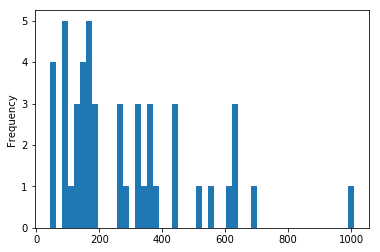

In [123]:
df_drug['length'].plot(bins=50, kind='hist')

In [124]:
df_drug.length.describe()

count      48.000000
mean      284.937500
std       207.848493
min        43.000000
25%       136.750000
50%       197.000000
75%       368.500000
max      1010.000000
Name: length, dtype: float64

In [200]:
df_drug[df_drug['length'] == 197]['Text'].iloc[0]

'This is an update on the Immunotherapy drug Opdivo (AKA: Nivolumab) Like Keytruda (see post above), Opdivo is a Monoclonal antibody and acts as a checkpoint inhibitor, specifically a PD1 inhibitor.'

In [126]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,48):
    review = re.sub('[^a-zA-Z]', ' ', df_drug['Text'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100)
X=cv.fit_transform(corpus).toarray()
y=df_drug.iloc[:,0].values

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [129]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [130]:
y_test

array([-1,  0,  1, -1,  1,  1,  1,  0,  0,  0])

In [191]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [192]:
y_pred = classifier.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [194]:
cm

array([[1, 0, 1],
       [2, 2, 0],
       [1, 0, 3]])

In [195]:
predictions = classifier.predict(X_test)

In [196]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1 0 1]
 [2 2 0]
 [1 0 3]]
              precision    recall  f1-score   support

          -1       0.25      0.50      0.33         2
           0       1.00      0.50      0.67         4
           1       0.75      0.75      0.75         4

    accuracy                           0.60        10
   macro avg       0.67      0.58      0.58        10
weighted avg       0.75      0.60      0.63        10

0.6


## Vader Sentiment Analyzer

In [202]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [209]:
trial = df_drug['Text']

In [210]:
trial[:10]

0    It only discusses these Monoclonal Antibodies ...
1    Listen to the podcast to hear Dr Loi explain:r...
2    She also is a member of the Breast Immuno-Onco...
3    I have read the data from the Herceptin and Ne...
4    It only discusses these Monoclonal Antibodies ...
5    Herceptin, Perjeta, and Kadcyla (TDM-1) are co...
6    This was a two armed trial, and half were give...
7    chrissie - it was the GP2 peptide vaccine give...
8    Therapeutic cancer vaccines currently being re...
9    NeuVax was unable to prevent recurrence in thi...
Name: Text, dtype: object

In [211]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in trial:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:10])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'It only discusses these Monoclonal Antibodies (mAbs) used for HER2+ patients: Herceptin (trastuzumab), Tykerb (lapatinib), Perjeta (pertuzumab), Kadcyla (Trastuzumab or T-DM1).'}, {'neg': 0.086, 'neu': 0.778, 'pos': 0.136, 'compound': 0.4926, 'headline': 'Listen to the podcast to hear Dr Loi explain:results from the PANACEA trial, which looked at using the immunotherapy medicine Keytruda (chemical name: pembrolizumab) along with Herceptin to treat Herceptin-resistant, HER2-positive, advanced-stage breast cancer that had high levels of PDL-1, a biomarker that indicates that Keytruda will be effective how an immunotherapy medicine like Keytruda works what tumor-infiltrating lymphocytes (TILs) are and why cancer tumors with high numbers of TILs seem to respond better to immunotherapyside effects of immunotherapy medicines Running time: 17:52    Thank you for this podcast!'}, {'neg': 0.196, 'neu': 0.773, 'pos': 0.031, 'com

In [212]:
immun = pd.DataFrame(results)

In [213]:
immun.to_csv('immun.csv')

In [215]:
df_sent = pd.read_csv('immun.csv')
df_sent.head()

,compound,headline,neg,neu,pos,rating 1
0,0.0000,It only discusses these Monoclonal Antibodies ...,0.000,1.000,0.000,0
1,0.4926,Listen to the podcast to hear Dr Loi explain:r...,0.086,0.778,0.136,1
2,-0.9201,She also is a member of the Breast Immuno-Onco...,0.196,0.773,0.031,-1
3,0.1027,I have read the data from the Herceptin and Ne...,0.124,0.705,0.171,1
4,0.0000,It only discusses these Monoclonal Antibodies ...,0.000,1.000,0.000,0


In [223]:
df_sent.shape

(48, 7)

In [224]:
df_sent.loc[df_sent['compound'] <= -0.05, 'rating 2'] = -1
df_sent.loc[df_sent['compound'] >= 0.05, 'rating 2'] = 1
df_x = df_sent.fillna(0)

In [217]:
from sklearn import metrics

In [225]:
y_test = df_x['rating 1']
y_pred = df_x['rating 2']

In [226]:
y_pred

0     0.0
1     1.0
2    -1.0
3     1.0
4     0.0
5     1.0
6    -1.0
7     0.0
8    -1.0
9    -1.0
10    0.0
11    1.0
12   -1.0
13   -1.0
14    1.0
15    0.0
16   -1.0
17   -1.0
18    0.0
19   -1.0
20    0.0
21   -1.0
22    1.0
23   -1.0
24   -1.0
25    1.0
26    1.0
27    0.0
28    1.0
29    1.0
30    0.0
31    1.0
32   -1.0
33   -1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39   -1.0
40   -1.0
41   -1.0
42   -1.0
43   -1.0
44   -1.0
45   -1.0
46   -1.0
47   -1.0
Name: rating 2, dtype: float64

In [227]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6041666666666666
Mean Squared Error: 0.8958333333333334
Root Mean Squared Error: 0.9464847243000456


In [265]:
print(accuracy_score(y_test, y_pred))

0.5416666666666666
